<a href="https://colab.research.google.com/github/mahmayer/Mackenzie/blob/main/Aprofundamento_T4_AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##UNIVERSIDADE PRESBITERIANA MACKENZIE
##PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS
*Mayara Marques*

##**Análise de Dados - Tarefa de Aprofundamento Trilha 4**

###**1. Introdução**

O tema escolhido para análise de dados foi a participação feminina na força de trabalho. 

As dificuldades e superações das mulheres no mercado de trabalho vêm de muito tempo. Segundo Leone, Krein e Teixeira (2017), entre os anos de 1930 e 1950 a indústria absorvia mão de obra masculina, enquanto as mulheres ficavam em atividades domésticas, educacionais e de saúde. Em 1970 apenas 18,5% das mulheres ocupavam um cargo de trabalho remunerado. Só a partir de 1980, que houve um crescimento na participação das mulheres na força de trabalho e com isso, elas começaram a se destacar nas áreas de ciências humanas, sociais, biológicas e da saúde, enquanto os homens se concentravam em ciências exatas, tecnológicas e agrárias. Esse crescimento ocorreu por causa da necessidade econômica e das transformações demográficas, culturais e sociais que vinham ocorrendo no Brasil e no mundo. A partir dos anos 90, as mulheres alcançaram maiores graus de escolaridade, e conseguiram se infiltrar em áreas onde antes eram predominantemente masculinas. A partir de então, a participação das mulheres no mercado de trabalho aumentou, mesmo que a passos bem lentos. (LEONE, KREIN e TEIXEIRA, 2017)

Dessa forma, este estudo tem como objetivo analisar a participação feminina no mercado de trabalho, respondendo 4 questões:
* Nos últimos anos, houve realmente um crescimento da participação feminina na força de trabalho brasileira?
*	Qual a diferença no ano de 2020 da participação feminina no mercado de trabalho brasileiro em relação a participação masculina?
*	A participação feminina no mercado de trabalho de um país desenvolvido é maior ou menor?
*	A participação feminina no mercado de trabalho de um país subdesenvolvido é maior ou menor?

Obs.: Os dados desse trabalho foram todos retirados do Gapminder (https://www.gapminder.org/).


### **2. Análise da participação feminina no mercado de trabalho**

#### **2.1. Importação dos dados**

Primeiramente serão obtidos os dados a serem analisados, taxa de participação na força de trabalho masculina e feminina com mais de 15 anos, que estão em dois arquivos 'csv'.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

f_force = pd.read_csv('https://drive.google.com/uc?id=1LGCLOpGwivKcyiK4CxnWiBwirPx7V4aW')
m_force = pd.read_csv('https://drive.google.com/uc?id=1hh7PZQ8FItyLxs2_24dbwakmax7LFv6u')

f_force.head()
#m_force.head()

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Afghanistan,14.8,14.9,14.9,14.9,14.9,15.0,14.8,14.7,14.6,14.5,14.5,14.8,15.2,15.5,15.8,16.1,15.7,15.2,14.9,14.7,14.7,15.3,16.0,16.9,17.8,18.7,19.4,19.5,19.5,19.6,19.6,19.7,19.7,19.7,19.8,19.8,19.8,19.9,19.9,19.9,19.9
1,Angola,75.2,75.1,75.0,74.8,74.7,74.7,74.7,74.7,74.7,74.7,74.7,74.8,74.7,74.7,74.8,74.9,75.0,75.1,75.2,75.2,75.3,75.3,75.4,75.4,75.4,75.4,75.3,75.3,75.3,75.3,75.3,75.3,75.2,75.2,75.2,75.3,75.3,75.4,75.5,75.6,75.7
2,Albania,53.6,55.8,56.1,55.3,54.5,53.5,52.9,53.6,53.0,52.2,51.7,51.1,50.7,49.8,48.9,48.1,47.4,46.8,46.3,44.9,45.7,47.1,48.8,44.6,44.8,47.7,47.4,47.2,47.0,46.9,46.7,46.6,46.5,46.4,46.2,46.0,45.8,45.5,45.1,44.7,44.4
3,United Arab Emirates,29.2,29.4,29.8,30.2,30.8,31.3,31.6,32.0,32.5,33.1,33.7,34.1,34.6,35.4,36.2,37.2,38.6,40.1,41.8,42.6,42.9,42.7,42.5,42.3,42.1,41.8,41.3,40.9,40.6,40.3,40.1,39.6,39.1,38.7,38.4,38.1,37.7,37.4,37.1,36.9,36.8
4,Argentina,44.3,45.0,45.8,46.4,46.9,46.8,47.4,48.2,48.7,48.7,48.9,48.9,48.4,49.2,50.1,49.4,49.9,49.0,48.1,48.8,46.4,48.1,48.2,47.8,47.2,47.5,47.4,47.3,47.2,47.1,47.0,46.9,46.8,46.7,46.6,46.5,46.5,46.4,46.3,46.2,46.1


#### **2.2. Preparação dos dados**

Nesta etapa os dados serão trabalhados para facilitar a análise. O Gapminder fornece os dados masculinos e femininos em conjuntos separados, por isso é necessário combiná-los para a realização das análises. 

Inicialmente será feita a seleção dos dados do Brasil, Noruega (país desenvolvido) e Moçambique (país subdesenvolvido) em cada arquivo. Depois as linhas serão transformadas em colunas, através do comando 'melt' da biblioteca pandas, para facilitar a comparação. Posteriormente, as colunas de cada país serão unidas, através do comando 'merge' e renomeadas, com o 'rename'. Serão criados três dataset, um para cada país, contendo a participação feminina e masculina na força de trabalho.

In [4]:
f_force_BR = f_force[ f_force.country == 'Brazil' ]
m_force_BR = m_force[ m_force.country == 'Brazil' ]
f_force_NO = f_force[ f_force.country == 'Norway' ]
m_force_NO = m_force[ m_force.country == 'Norway' ]
f_force_MZ = f_force[ f_force.country == 'Mozambique' ]
m_force_MZ = m_force[ m_force.country == 'Mozambique' ]

display(f_force_BR)
display(m_force_BR)
display(f_force_NO)
display(m_force_NO)
display(f_force_MZ)
display(m_force_MZ)

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
21,Brazil,42.0,42.9,43.8,44.7,45.6,46.6,47.5,48.4,49.3,50.2,51.1,52.0,53.5,53.9,54.9,55.4,56.0,55.6,55.8,56.0,54.6,53.1,53.1,53.0,52.9,53.4,53.3,53.2,53.1,52.9,52.8,52.6,52.5,52.3,52.1,51.9,51.7,51.5,51.2,50.9,50.7


,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
21,Brazil,83.2,82.9,82.6,82.2,81.9,81.5,81.1,80.7,80.3,79.9,79.6,79.2,79.3,79.0,79.4,79.2,79.1,78.6,78.6,78.6,77.7,76.8,76.2,76.1,75.7,75.4,74.9,74.7,74.5,74.3,74.1,73.9,73.6,73.4,73.1,72.8,72.5,72.1,71.8,71.4,71.0


,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
125,Norway,55.2,55.2,55.0,55.1,55.6,57.2,58.5,59.8,61.2,61.2,61.3,61.5,62.4,61.0,61.2,60.7,61.0,62.1,63.2,62.6,61.8,61.7,61.6,61.6,61.3,61.3,60.9,60.8,60.8,60.8,60.7,60.6,60.5,60.4,60.2,60.1,60.0,59.9,59.9,59.8,59.6


,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
125,Norway,70.3,69.0,69.0,68.5,68.9,69.3,70.6,72.2,72.9,72.4,72.9,72.5,72.0,70.8,70.4,70.3,70.5,70.8,71.7,70.3,69.7,68.8,69.0,68.4,68.1,68.4,67.8,67.6,67.4,67.2,67.0,66.7,66.5,66.2,65.9,65.7,65.4,65.2,65.0,64.8,64.6


,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
114,Mozambique,87.2,87.1,86.9,86.8,86.8,86.8,86.9,86.9,87.2,87.4,87.6,87.7,87.7,87.7,87.4,87.1,86.6,86.2,85.6,85.0,84.4,83.7,83.0,82.9,82.9,82.8,82.8,82.5,82.3,82.1,81.9,81.7,81.5,81.3,81.1,80.9,80.7,80.5,80.3,80.1,79.9


,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
114,Mozambique,82.4,81.7,81.3,80.9,80.7,80.5,80.4,80.3,81.4,82.1,82.6,83.0,83.2,83.3,83.1,82.9,82.4,81.9,81.1,80.1,78.8,77.3,75.5,75.3,75.1,74.8,74.5,74.6,74.6,74.7,74.7,74.8,74.9,74.9,75.0,75.1,75.1,75.2,75.3,75.4,75.4


In [5]:
f_force_BR_col = pd.melt(f_force_BR, id_vars=['country'])
m_force_BR_col = pd.melt(m_force_BR, id_vars=['country'])
f_force_NO_col = pd.melt(f_force_NO, id_vars=['country'])
m_force_NO_col = pd.melt(m_force_NO, id_vars=['country'])
f_force_MZ_col = pd.melt(f_force_MZ, id_vars=['country'])
m_force_MZ_col = pd.melt(m_force_MZ, id_vars=['country'])

f_force_BR_col.head()
#m_force_BR_col.head()
#f_force_NO_col.head()
#m_force_NO_col.head()
#f_force_MZ_col.head()
#m_force_MZ_col.head()

,country,variable,value
0,Brazil,1989,42.0
1,Brazil,1990,42.9
2,Brazil,1991,43.8
3,Brazil,1992,44.7
4,Brazil,1993,45.6


In [6]:
Brazil = pd.merge(f_force_BR_col, m_force_BR_col, on=['country','variable'])
Norway = pd.merge(f_force_NO_col, m_force_NO_col, on=['country','variable'])
Mozambique = pd.merge(f_force_MZ_col, m_force_MZ_col, on=['country','variable'])

Brazil.head()
#Norway.head()
#Mozambique.head()

,country,variable,value_x,value_y
0,Brazil,1989,42.0,83.2
1,Brazil,1990,42.9,82.9
2,Brazil,1991,43.8,82.6
3,Brazil,1992,44.7,82.2
4,Brazil,1993,45.6,81.9


In [20]:
BR = Brazil.rename(columns={'variable':'year', 'value_x':'f_force_BR', 'value_y':'m_force_BR'})
NO = Norway.rename(columns={'variable':'year', 'value_x':'f_force_NO', 'value_y':'m_force_NO'})
MZ = Mozambique.rename(columns={'variable':'year', 'value_x':'f_force_MZ', 'value_y':'m_force_MZ'})

BR.head()
#NO.head()
#MZ.head()

,country,year,f_force_BR,m_force_BR
0,Brazil,1989,42.0,83.2
1,Brazil,1990,42.9,82.9
2,Brazil,1991,43.8,82.6
3,Brazil,1992,44.7,82.2
4,Brazil,1993,45.6,81.9


#### **2.3. Visualização e Análise dos dados**

Para auxiliar na análise dos dados será feito, primeiramente, um gráfico para cada país, comparando a força de trabalho feminina com a masculina. E depois será feito um gráfico comparando a participação feminina no mercado de trabalho nos três países.

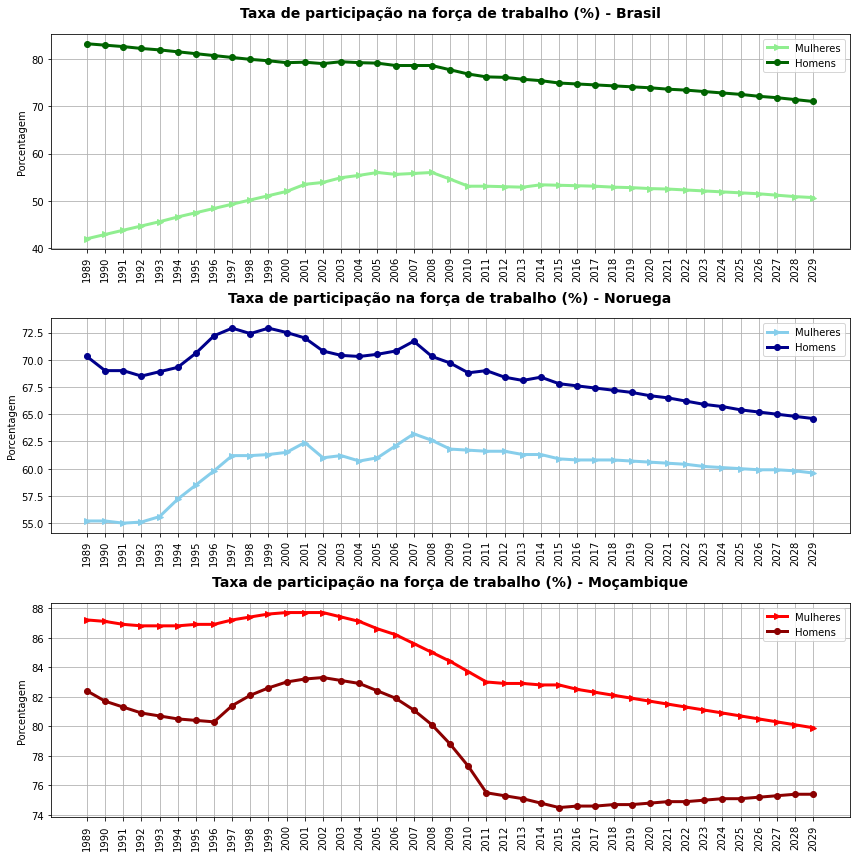

In [21]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.plot(BR.year, BR.f_force_BR, color= 'lightgreen', linewidth=3, marker='>', label= 'Mulheres')
plt.plot(BR.year, BR.m_force_BR, color= 'darkgreen', linewidth=3, marker='o', label= 'Homens')
plt.title('Taxa de participação na força de trabalho (%) - Brasil', fontsize=14, weight='bold', y=1.05)
plt.ylabel('Porcentagem')
plt.xticks(rotation=90)
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(NO.year, NO.f_force_NO, color= 'skyblue', linewidth=3, marker='>', label= 'Mulheres')
plt.plot(NO.year, NO.m_force_NO, color= 'darkblue', linewidth=3, marker='o', label= 'Homens')
plt.title('Taxa de participação na força de trabalho (%) - Noruega', fontsize=14, weight='bold', y=1.05)
plt.ylabel('Porcentagem')
plt.xticks(rotation=90)
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(MZ.year, MZ.f_force_MZ, color= 'red', linewidth=3, marker='>', label= 'Mulheres')
plt.plot(MZ.year, MZ.m_force_MZ, color= 'darkred', linewidth=3, marker='o', label= 'Homens')
plt.title('Taxa de participação na força de trabalho (%) - Moçambique', fontsize=14, weight='bold', y=1.05)
plt.ylabel('Porcentagem')
plt.xticks(rotation=90)
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()

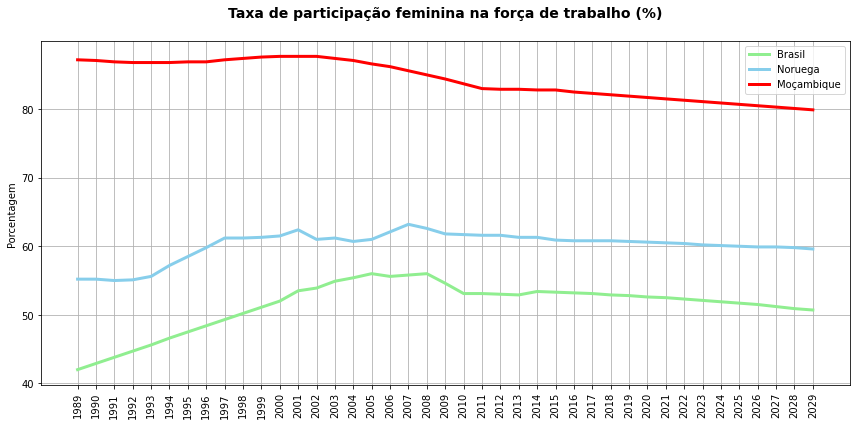

In [24]:
plt.figure(figsize=(12,6))

plt.plot(BR.year, BR.f_force_BR, color= 'lightgreen', linewidth=3, label= 'Brasil')
plt.plot(NO.year, NO.f_force_NO, color= 'skyblue', linewidth=3, label= 'Noruega')
plt.plot(MZ.year, MZ.f_force_MZ, color= 'red', linewidth=3, label= 'Moçambique')

plt.title('Taxa de participação feminina na força de trabalho (%)', fontsize=14, weight='bold', y=1.05)
plt.ylabel('Porcentagem')
plt.xticks(rotation=90)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

No gráfico que apresenta a força de trabalho no Brasil, pode ser observado que a participação feminina ainda é muito inferior a participação masculina, apesar de ter aumentado ao longo do tempo, principalmente entre os anos de 1989 e 2005. Entretanto, nos últimos anos, de 2010 a 2021, não houve crescimento na taxa feminina brasileira, inclusive teve até um pequeno declínio. 

Pode-se observar também que no ano de 2020, 53% das mulheres trabalhavam, já os homens, o número sobe para 74%, mostrando que atualmente ainda há uma grande desigualdade de gêneros no mercado de trabalho.

Como país desenvolvido foi selecionado aleatoriamente a Noruega. O seu gráfico mostra que as mulheres também apresentam uma participação menor na força de trabalho, porém nos últimos anos essa diferença tem diminuído para aproximadamente 5%.

E como país subdesenvolvido foi escolhido, também aleatoriamente, o Moçambique. E o resultado gráfico é totalmente diferente dos outros dois países. No Moçambique a taxa de participação feminina no mercado de trabalho é maior, e apesar dela ter diminuído com o decorrer dos anos, a participação das mulheres já chegou em quase 88% no ano de 2000, ou seja, da população total feminina, 88% trabalhava, para 83% dos homens no ano citado.

No último gráfico é possível comparar a taxa de participação feminina nos três países e verificar que o Brasil é o país que apresenta a menor taxa entre eles. Nos últimos 10 anos, o Brasil ficou abaixo dos 55% e a Noruega ficou um pouco acima dos 60%. Já a participação feminina na força de trabalho em Moçambique nos últimos foi acima de 80%.

Por último, é possível observar que os gráficos apresentam uma previsão até 2029. E segundo essa estimativa, a taxa de participação feminina na força de trabalho brasileira ainda será bem menor que a masculina, permanecendo a diferença de aproximadamente 20%.

# Conclusão

Essa análise de dados quis mostrar que apesar das mulheres brasileiras estarem ganhando espaço no mercado de trabalho nos últimos anos, ainda está muito longe da igualdade de gênero na força de trabalho. A Noruega e Moçambique possuem uma diferença entre a taxa de homens e mulheres que trabalham muito menor, porém não dá para afirmar apenas com esses dados que esses países possuem igualdade de gênero, pois não é levado em consideração as ocupações profissionais nem os salários. 

Enfatizando o contexto brasileiro, é preciso que o movimento de diversidade nas empresas, que vem ganhando força atualmente, se expanda por todo o mercado de trabalho. É necessário que seja realmente reconhecido a importância para a sociedade da inserção cada vez maior das mulheres na força de trabalho.

Claramente essa é uma análise bastante simplificada e simplória, porém sugere-se uma análise mais detalhada que abranja mais indicadores, como setores ocupados pelas mulheres e faixa salarial, além de considerar mais países na análise.

# Referência

LEONE, Eugenia Troncoso; KREIN, José Dari; TEIXEIRA, Marilane. **Caderno 3: As mulheres e o mercado de trabalho.** São Paulo: UNICAMP, 2017. Cadernos de Formação - Mulheres: mundo do trabalho e autonomia econômica. Disponível em: <https://www.eco.unicamp.br/images/arquivos/caderno-3-web.pdf>. Acesso: 23 de setembro de 2021.

Link para verificar o código: 